In [2]:
# https://scikit-learn.org/stable/modules/manifold.html#t-sne

In [3]:
import h5py
import numpy as np
from sklearn.manifold import TSNE

In [22]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

In [23]:
RANDOM_STATE = 42

## USPS

In [6]:
with h5py.File('../data/usps.h5', 'r') as hf:
    train = hf.get('train')
    X_train = train.get('data')[:]
    y_train = train.get('target')[:]
    test = hf.get('test')
    X_test = test.get('data')[:]
    y_test = test.get('target')[:]
    
X_train.shape, y_train.shape

((7291, 256), (7291,))

In [7]:
tsne = TSNE(n_components=2, init='random', random_state=RANDOM_STATE)
X_2d = tsne.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
target_ids = np.unique(y)
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=RANDOM_STATE)
X_2d = tsne.fit_transform(X)

In [ ]:
target_ids = np.unique(y)
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Gait

In [8]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

In [9]:
BASE_FOLDER = Path('../data')

In [10]:
def get_csv(session, split):
    return 'zju_gaitaccel_session_' + str(session) + '_' + str(split) + '.csv'

In [11]:
df_s1_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(1, 128))), header=None)
df_s2_128 = pd.read_csv(BASE_FOLDER.joinpath(Path(get_csv(2, 128))), header=None)

In [12]:
select_classes = ['u%03d' % i for i in range(1, 11)]
# df = pd.concat([df_s1_128, df_s2_128])
df = df_s1_128
df = df.loc[df[df.columns[-1]].isin(select_classes)]
y = df[df.columns[-1]].values
df.drop([df.columns[-1]], axis=1, inplace=True)
y = LabelEncoder().fit_transform(y)
X = df.values

/home/nemesszili/.conda/envs/gait_torch/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
y.shape, X.shape

((534,), (534, 59))

In [82]:
tsne = TSNE(n_components=2, init='random', random_state=RANDOM_STATE)
X_2d = tsne.fit_transform(X)

In [83]:
X_2d.shape

(534, 2)

No handles with labels found to put in legend.


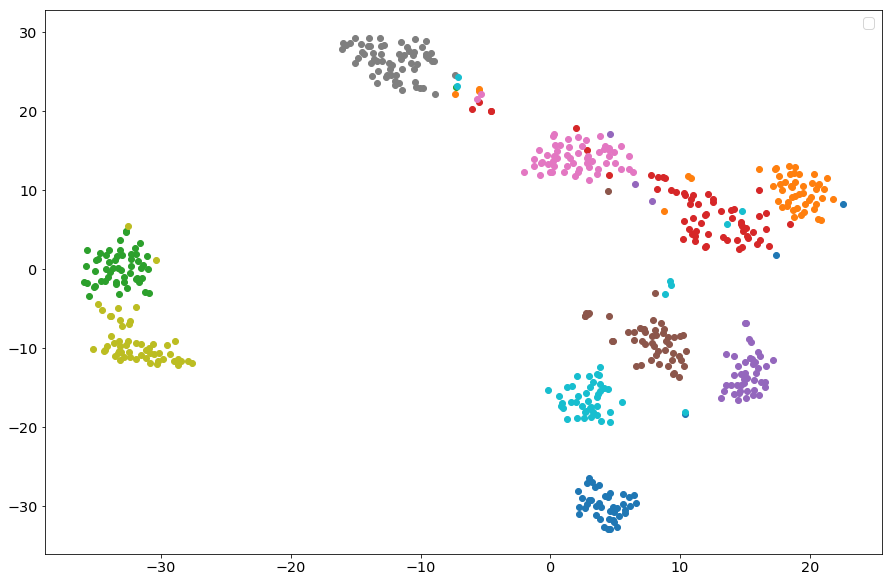

In [84]:
target_ids = np.unique(y)
for i in target_ids:
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1])
plt.legend()
plt.show()

In [14]:
tsne = TSNE(n_components=2, init='pca', random_state=RANDOM_STATE)
X_2d = tsne.fit_transform(X)

No handles with labels found to put in legend.


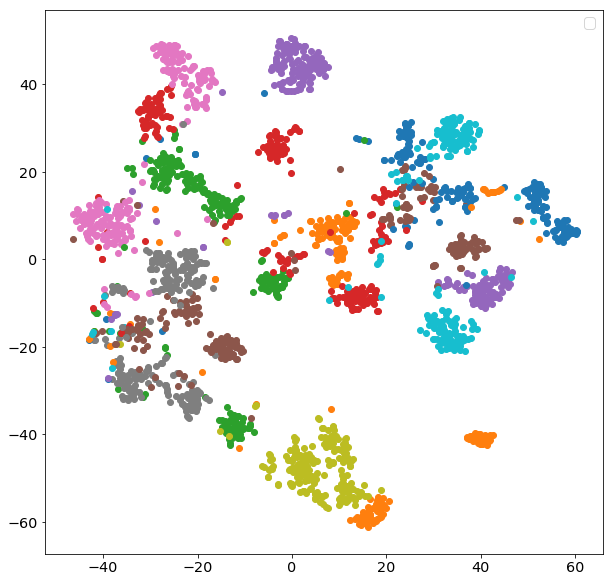

In [120]:
target_ids = np.unique(y)
for i in target_ids:
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1])
plt.legend()
plt.show()

In [15]:
X_2d.shape, y.shape

((534, 2), (534,))

In [16]:
data = np.concatenate((X_2d, y.reshape(y.shape[0], 1)), axis=1)

In [17]:
viz_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])

In [18]:
viz_df.head()

,x,y,class
0,2.498340,23.877296,0.0
1,27.071314,-4.012915,0.0
2,26.432613,-5.786097,0.0
3,25.934175,-5.351501,0.0
4,27.030912,-6.087504,0.0


In [19]:
import seaborn as sns

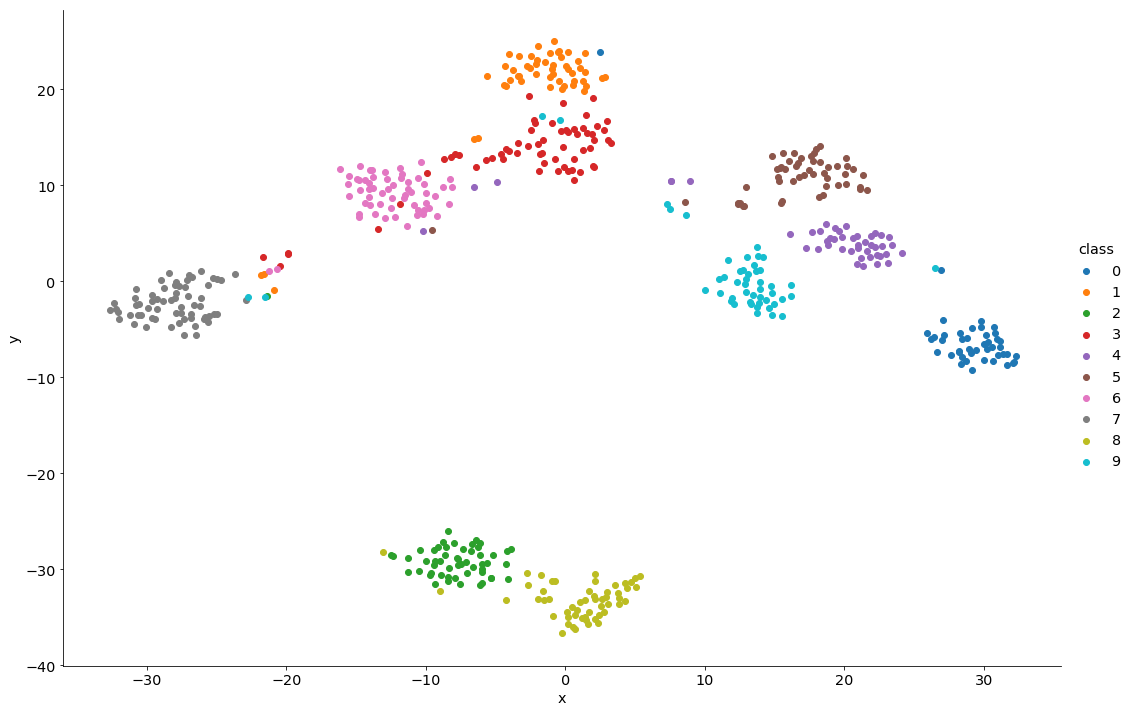

In [20]:
fg = sns.FacetGrid(data=viz_df, hue='class', hue_order=np.unique(y), aspect=1.5, height=10)
fg.map(plt.scatter, 'x', 'y').add_legend()